In [1]:
dfsolutions=read.csv("https://peter.butka.website.tuke.sk/res/solutions.csv")

In [2]:
time=dfsolutions$time_left

In [3]:
head(dfsolutions,10)

,id,problem_id,subject_id,start,stop,time_left,answer
,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,156,29,1304095119,1304095169,2343,B
2,2,269,25,1304095119,1304095183,2329,C
3,3,34,22,1304095127,1304095146,2366,C
4,4,19,23,1304095127,1304095150,2362,D
5,5,605,26,1304095127,1304095167,2345,A
6,6,384,27,1304095131,1304095270,2242,C
7,7,538,28,1304095133,1304095201,2311,C
8,8,312,24,1304095134,1304095198,2314,D
9,9,327,22,1304095151,1304095184,2328,E


In [4]:
str(dfsolutions)

'data.frame':	205 obs. of  7 variables:
 $ id        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ problem_id: int  156 269 34 19 605 384 538 312 327 194 ...
 $ subject_id: int  29 25 22 23 26 27 28 24 22 23 ...
 $ start     : int  1304095119 1304095119 1304095127 1304095127 1304095127 1304095131 1304095133 1304095134 1304095151 1304095152 ...
 $ stop      : int  1304095169 1304095183 1304095146 1304095150 1304095167 1304095270 1304095201 1304095198 1304095184 1304095175 ...
 $ time_left : int  2343 2329 2366 2362 2345 2242 2311 2314 2328 2337 ...
 $ answer    : chr  "B" "C" "C" "D" ...


In [5]:
dfsolutions = na.omit(dfsolutions)

In [13]:
dfsolutions$subject_id=as.factor(dfsolutions$subject_id)

In [14]:
dfsolutions$stop[6]

[1] 1304095270

In [15]:
dfsolutions[6,4]

[1] 1304095131

In [16]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [17]:
dfsolutions_numeric = select_if(dfsolutions, is.numeric)

In [18]:
head(dfsolutions_numeric)

,id,problem_id,start,stop,time_left
,<int>,<int>,<int>,<int>,<int>
1,1,156,1304095119,1304095169,2343
2,2,269,1304095119,1304095183,2329
3,3,34,1304095127,1304095146,2366
4,4,19,1304095127,1304095150,2362
5,5,605,1304095127,1304095167,2345
6,6,384,1304095131,1304095270,2242


In [19]:
lapply(dfsolutions_numeric, mean)

$id
[1] 100.1457

$problem_id
[1] 310.2412

$start
[1] 1304096329

$stop
[1] 1304096387

$time_left
[1] 1124.769

In [20]:
sapply(dfsolutions_numeric, mean)

id   problem_id        start         stop    time_left 
1.001457e+02 3.102412e+02 1.304096e+09 1.304096e+09 1.124769e+03

In [21]:
apply(dfsolutions_numeric, 2, mean)

id   problem_id        start         stop    time_left 
1.001457e+02 3.102412e+02 1.304096e+09 1.304096e+09 1.124769e+03

In [22]:
dfsolutions$time = ifelse(dfsolutions$time_left > 2000, TRUE,FALSE)

In [23]:
head(dfsolutions$time)

[1] TRUE TRUE TRUE TRUE TRUE TRUE

In [24]:
dfsolutons_1 = filter(dfsolutions, problem_id > 200)
head(dfsolutons_1)

,id,problem_id,subject_id,start,stop,time_left,answer,time
,<int>,<int>,<fct>,<int>,<int>,<int>,<chr>,<lgl>
1,2,269,25,1304095119,1304095183,2329,C,TRUE
2,5,605,26,1304095127,1304095167,2345,A,TRUE
3,6,384,27,1304095131,1304095270,2242,C,TRUE
4,7,538,28,1304095133,1304095201,2311,C,TRUE
5,8,312,24,1304095134,1304095198,2314,D,TRUE
6,9,327,22,1304095151,1304095184,2328,E,TRUE


In [26]:
dfsolutions_2 = dfsolutions[order(dfsolutions$subject_id),]
head(dfsolutions_2)

,id,problem_id,subject_id,start,stop,time_left,answer,time
,<int>,<int>,<fct>,<int>,<int>,<int>,<chr>,<lgl>
3,3,34,22,1304095127,1304095146,2366,C,TRUE
9,9,327,22,1304095151,1304095184,2328,E,TRUE
18,18,456,22,1304095212,1304095276,2236,C,TRUE
34,34,488,22,1304095478,1304095512,2000,E,FALSE
54,54,174,22,1304095718,1304095874,1638,D,FALSE
65,65,474,22,1304095881,1304095923,1589,A,FALSE


In [28]:
summary_time_left = summary(dfsolutions$time_left)
print(summary_time_left)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     17     468    1061    1125    1776    2366 


In [36]:
class(summary_time_left["Min."])

[1] "table"

In [37]:
library(utils)
# install.package(ggplot2)
library(ggplot2)

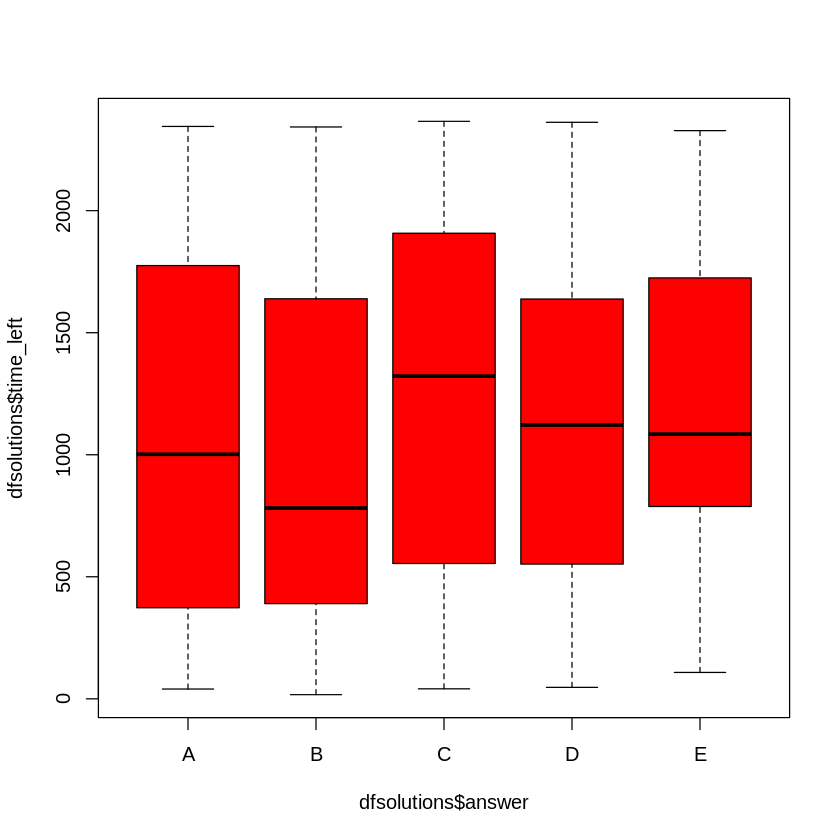

In [38]:
boxplot(dfsolutions$time_left ~ dfsolutions$answer, col = "red")

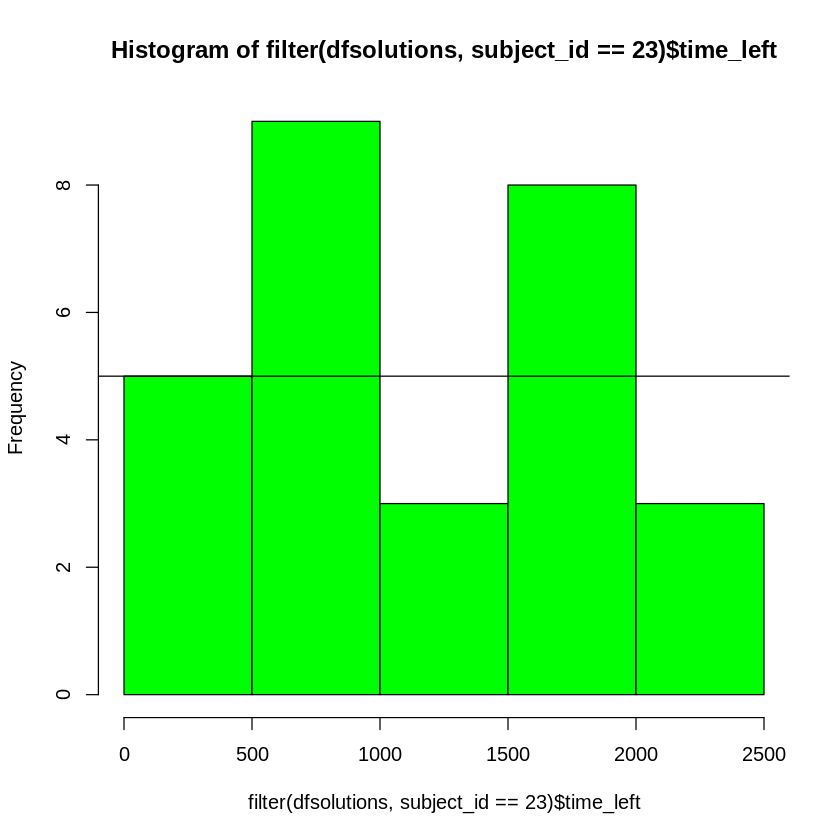

In [39]:
hist(filter(dfsolutions, subject_id == 23)$time_left, col = "green")
abline(h = 5)

In [40]:
library(lattice)

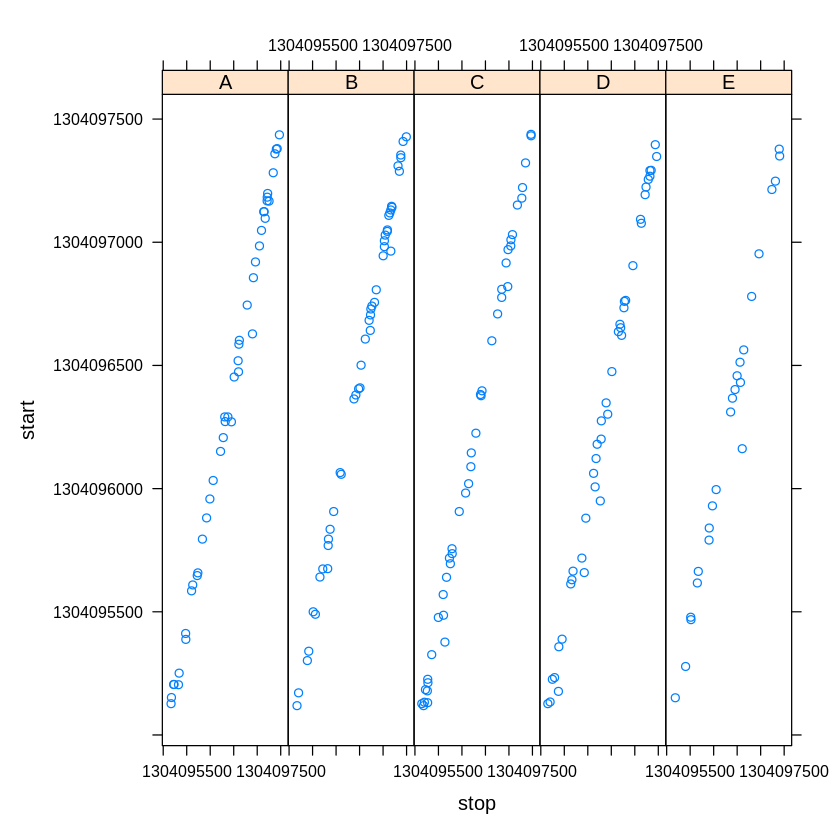

In [43]:
xyplot(start~stop | answer, data = dfsolutions, layout = c(5,1))

In [44]:
help(qplot)

qplot {ggplot2},R Documentation
"x, y, ...",Aesthetics passed into each layer
data,"Data frame to use (optional). If not specified, will create one, extracting vectors from the current environment."
facets,faceting formula to use. Picks facet_wrap() or facet_grid() depending on whether the formula is one- or two-sided
margins,See facet_grid(): display marginal facets?
geom,"Character vector specifying geom(s) to draw. Defaults to ""point"" if x and y are specified, and ""histogram"" if only x is specified."
"xlim, ylim",X and y axis limits
log,"Which variables to log transform (""x"", ""y"", or ""xy"")"
"main, xlab, ylab","Character vector (or expression) giving plot title, x axis label, and y axis label respectively."
asp,The y/x aspect ratio
"stat, position",


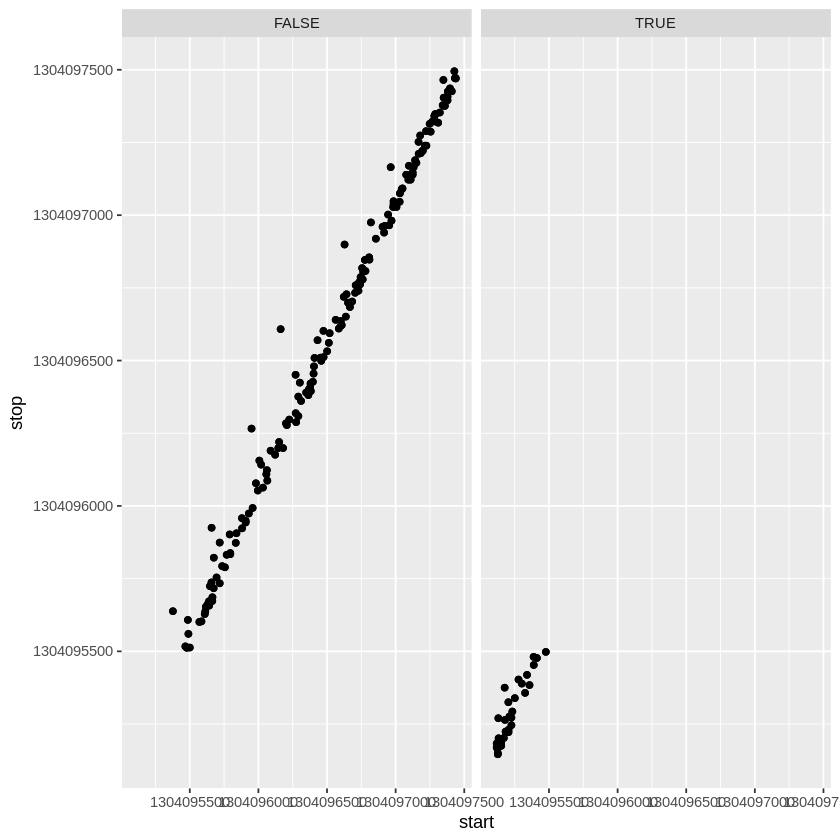

In [51]:
qplot(data = dfsolutions, x = start, y = stop) + geom_point() + facet_grid(~ time)

In [52]:
func <- function (c, d, n) {
  f <- seq(1, n, by = 0.5)

  for (i in f) {
    if (i == c) {
      print("A")
    } else if (i == d) {
      print("B")
    } else {
      print(i)
    }
  }
}

func(c = 1, d = 2, n = 5)

[1] "A"
[1] 1.5
[1] "B"
[1] 2.5
[1] 3
[1] 3.5
[1] 4
[1] 4.5
[1] 5


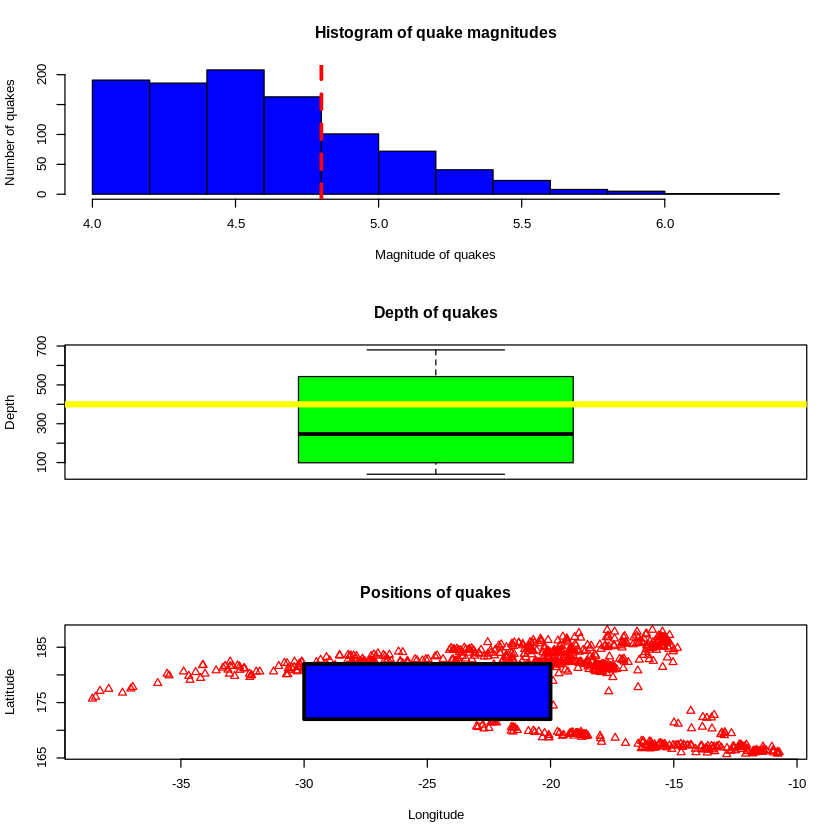

In [55]:
data(quakes)

par(mfrow = c(3, 1))

hist(quakes$mag, breaks = 15, col = "blue", main = "Histogram of quake magnitudes", xlab = "Magnitude of quakes", ylab = "Number of quakes")
abline(v = 4.8, lty = 2, col = "red", lwd = 3)

boxplot(quakes$depth, col = "green", main = "Depth of quakes", ylab = "Depth")
abline(h = 400, col = "yellow", lwd = 5)

plot(quakes$lat, quakes$long, type = "p", pch = 24, col = "red", main = "Positions of quakes", xlab = "Longitude", ylab = "Latitude")
rect(-30, 172, -20, 182, col = "blue", lwd = 3)

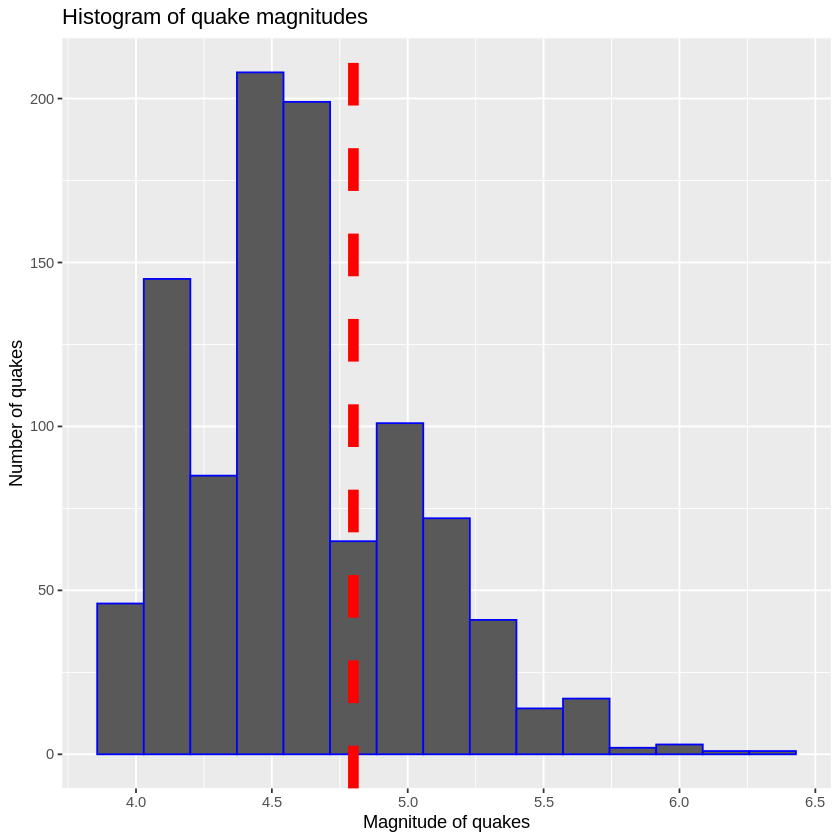

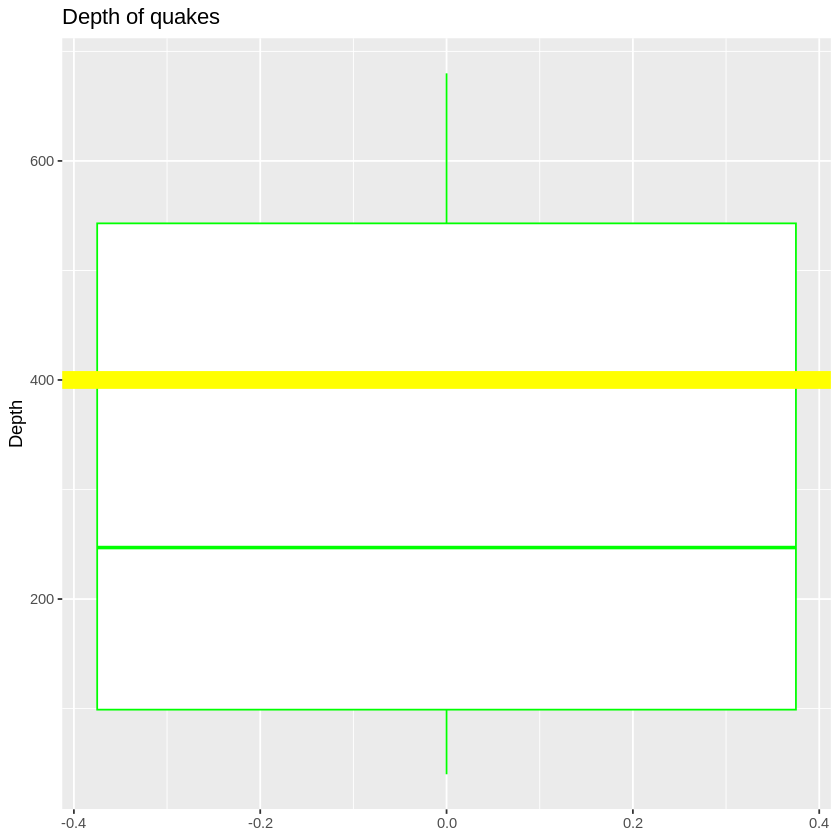

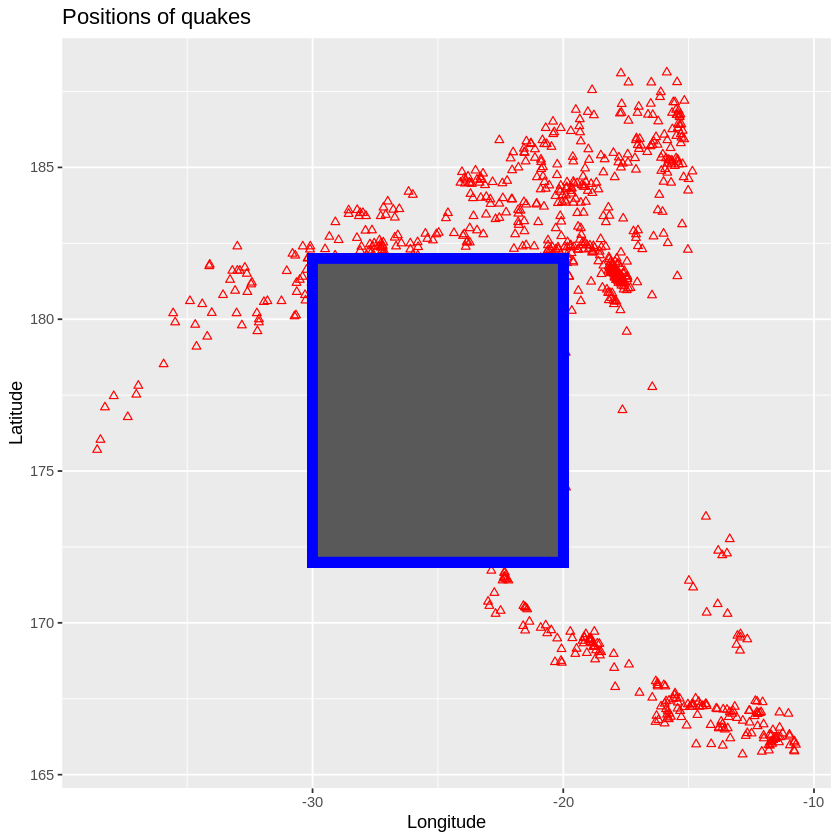

In [60]:
ggplot(quakes, aes(mag)) +
  geom_histogram(bins = 15, color = "blue") +
  labs(title = "Histogram of quake magnitudes", x = "Magnitude of quakes", y = "Number of quakes") +
  geom_vline(xintercept = 4.8, linetype = 2, color = "red", linewidth = 3)

ggplot(quakes, aes(y = depth)) +
  geom_boxplot(color = "green") +
  labs(title = "Depth of quakes", y = "Depth") +
  geom_hline(yintercept = 400, color = "yellow", linewidth = 5)

ggplot(quakes, aes(lat, long)) +
  geom_point(color = "red", shape = 24) +
  labs(title = "Positions of quakes", x = "Longitude", y = "Latitude") +
  geom_rect(xmin = -30, xmax = -20, ymin = 172, ymax = 182, color = "blue", linewidth = 3)